In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Parameters

In [2]:
TF1 = 1
TF2 = 2
TF3 = 3
NTest = 96
NVal = 100
T1 = 30
D = 15

In [3]:
def split_X_Y(ar, T, TF):
  X = []
  Y = []
  for t in range(len(ar) - T - TF + 1):
    x = ar[t : t + T, 0: -1]
    X.append(x)
    y = ar[t + T : t + T + TF, -1:]
    Y.append(y)

  X = np.array(X).astype(float) 
  if TF == 1:
    Y = np.array(Y).astype(float).reshape(len(Y), )
  else:
    Y = np.array(Y).astype(float).reshape(len(Y), TF)
  print("X.shape", X.shape, "Y.shape", Y.shape) 
  return X, Y

In [4]:
def feature_selection(x_train, y_train):
  rfe = RFE(RandomForestRegressor(), n_features_to_select=18)
  fit = rfe.fit(x_train.reshape(len(x_train),D*T1), y_train)
  important_features = list()
  for i in range(len(fit.support_)):
      if fit.support_[i]:
          important_features.append(i)
  result = np.array(important_features)
  calMostFeature = [0]*D
  for i in result:
    calMostFeature[i%D] = calMostFeature[i%D] + 1
  print(calMostFeature)
  return calMostFeature

In [5]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score
from statistics import mean 

In [6]:
def deviation_function(y, pred):
  deviation = []
  for i in range(0, len(y)):
    deviation.append(abs(pred[i] - y[i]) / y[i])
  return mean(deviation)
def deviation_function_inv(y, pred):
  deviation = []
  for i in range(0, len(y)):
    deviation.append(abs(pred[i] - y[i]) / y[i])
  return mean(np.array(deviation).mean(axis=1))
def evaluation(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df
def evaluation_inv(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function_inv(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df

# Normalization Dataset

In [7]:
df_normalize = pd.read_csv("G:/My Drive/IS6102.CH1701/Result/Dataset/normalization.csv", parse_dates=['Date'], index_col=0)
df_normalize.head(5)

,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,,,,,,,
2020-03-12,0.195054,0.428501,0.252108,0.035745,0.666943,0.028726,0.090175,0.096398,0.215437,0.385386,0.294139,0.478063,0.760187,0.813189,0.055378,0.000000
2020-03-13,0.066875,0.429926,0.236596,0.038759,0.662361,0.030444,0.023122,0.096398,0.145379,0.473294,0.327844,0.241249,0.699492,0.549101,0.038502,0.009472
2020-03-14,0.066875,0.429926,0.224523,0.036015,0.668942,0.030070,0.027929,0.096398,0.153463,0.453264,0.315684,0.060818,0.682915,0.560035,0.160002,0.003668
2020-03-15,0.066875,0.429926,0.241015,0.036838,0.654064,0.026986,0.015865,0.096398,0.129212,0.405045,0.227655,0.267530,0.500701,0.355787,0.267800,0.006734
2020-03-16,0.014977,0.411145,0.231549,0.033910,0.652156,0.028229,0.012953,0.096398,0.129212,0.416914,0.271336,0.282272,0.733482,0.526008,0.069977,0.000698


In [8]:
ar_original_minmax = df_normalize.to_numpy()
ar_original_minmax

array([[0.195054  , 0.4285006 , 0.25210841, ..., 0.81318927, 0.05537789,
        0.        ],
       [0.06687549, 0.42992625, 0.23659559, ..., 0.5491007 , 0.03850218,
        0.00947215],
       [0.06687549, 0.42992625, 0.22452314, ..., 0.56003522, 0.16000223,
        0.00366761],
       ...,
       [0.66997559, 0.70854771, 0.19900319, ..., 0.73869017, 0.08532489,
        0.24308976],
       [0.66997559, 0.70854771, 0.19728917, ..., 0.7039487 , 0.07841119,
        0.25020148],
       [0.66997559, 0.70854771, 0.20929626, ..., 0.50852748, 0.11842803,
        0.27466851]])

## Sliding Windows

In [9]:
x13_original_minmax, y13_original_minmax = split_X_Y(ar_original_minmax, T1, TF1)

X.shape (1066, 30, 15) Y.shape (1066,)


## Train Val Test

In [10]:
x13_original_minmax_train, y13_original_minmax_train = x13_original_minmax[:-NTest], y13_original_minmax[: -NTest]
x13_original_minmax_test, y13_original_minmax_test = x13_original_minmax[-NTest:], y13_original_minmax[-NTest:]

In [11]:
print(x13_original_minmax_train.shape, y13_original_minmax_train.shape )
print(x13_original_minmax_test.shape, y13_original_minmax_test.shape )

(970, 30, 15) (970,)
(96, 30, 15) (96,)


## Feature Section

In [12]:
top_idx = np.loadtxt(f"G:/My Drive/IS6102.CH1701/Result/FeatureSelection/{T1}_{TF1}.csv", dtype=int)
top_idx

array([0, 1, 3, 6, 7])

In [13]:
NFeature = len(top_idx)
NFeature 

5

In [14]:
x13_original_minmax_train = x13_original_minmax_train[:,:,top_idx]
x13_original_minmax_test = x13_original_minmax_test[:,:,top_idx]

In [15]:
print(x13_original_minmax_train.shape)
print(x13_original_minmax_test.shape)

(970, 30, 5)
(96, 30, 5)


## Build The Model

### SARIMAX

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

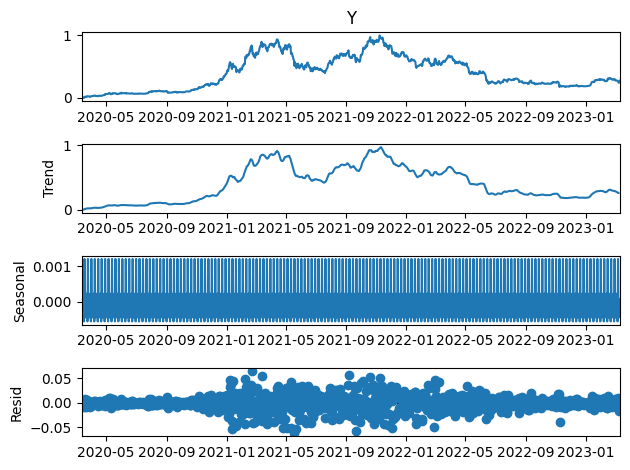

In [23]:
# from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_normalize["Y"])
result.plot()
pyplot.show()

In [24]:
import statsmodels.api as sm

In [25]:
sarimax_mod = sm.tsa.statespace.SARIMAX(y13_original_minmax_train, exog = x13_original_minmax_train.reshape(len(x13_original_minmax_train),NFeature*T1))
sarimax_fit = sarimax_mod.fit()

c:\Users\UYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [37]:
sarimax_pred = sarimax_fit.predict(start = 1, end = len(y13_original_minmax_test), exog = x13_original_minmax_test.reshape(len(x13_original_minmax_test),NFeature*T1))

In [38]:
evaluation(y13_original_minmax_test, sarimax_pred, "SARIMAX")

mse: 0.03275485498750207
mae: 0.1759119381151657
rmse: 0.18098302403126673
R-Squared: -14.027403381449636
Deviation: 0.703466898019475


,mse,mae,rmse,r2,deviation
SARIMAX,0.032755,0.175912,0.180983,-14.027403,0.703467


### Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [39]:
#linear regression model
from sklearn.linear_model import LinearRegression 
#Grid search model
from sklearn.model_selection import GridSearchCV         

In [40]:
parameters = {
    'fit_intercept':[True,False], 
    'copy_X':[True, False]
    }

In [41]:
lr_mod = GridSearchCV(LinearRegression(),parameters, scoring='r2', cv=None)
lr_fit = lr_mod.fit(x13_original_minmax_train.reshape(len(x13_original_minmax_train),NFeature*T1), y13_original_minmax_train)

In [42]:
lr_pred = lr_mod.predict(x13_original_minmax_test.reshape(len(x13_original_minmax_test),NFeature*T1))

In [43]:
evaluation(y13_original_minmax_test, lr_pred, "Linear Regression")

mse: 0.003315561274548538
mae: 0.05090952272199076
rmse: 0.05758091067835362
R-Squared: -0.5211264628576464
Deviation: 0.2059103166053946


,mse,mae,rmse,r2,deviation
Linear Regression,0.003316,0.05091,0.057581,-0.521126,0.20591


In [44]:
df_lr_para = pd.DataFrame(lr_mod.best_params_, index=[0])
df_lr_para.to_csv(f"G:/My Drive/IS6102.CH1701/Result/LR_parameter/{T1}_{TF1}.csv")

### XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/
https://xgboost.readthedocs.io/en/stable/

In [ ]:
# !pip install xgboost

In [70]:
from xgboost import XGBRegressor 

In [71]:
parameters = {
    'n_estimators': [80, 90, 100, 125, 150,200,1000,2000,3000, 3500],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': np.arange(0.1, 1, 0.1)
}

In [72]:
xgbr_mod = GridSearchCV(XGBRegressor(),parameters, scoring='r2', cv=None)
xgbr_fit = xgbr_mod.fit(x13_original_minmax_train.reshape(len(x13_original_minmax_train),NFeature*T1), y13_original_minmax_train)

In [73]:
xgbr_pred = xgbr_mod.predict(x13_original_minmax_test.reshape(len(x13_original_minmax_test),NFeature*T1))

In [74]:
evaluation(y13_original_minmax_test, xgbr_pred, "XGBoost Regression")

mse: 0.0029695144956302746
mae: 0.04497647245186453
rmse: 0.0544932518357115
R-Squared: -0.36236573753493495
Deviation: 0.1659764079495276


,mse,mae,rmse,r2,deviation
XGBoost Regression,0.00297,0.044976,0.054493,-0.362366,0.165976


In [75]:
xgbr_mod.best_params_

{'learning_rate': 0.7000000000000001, 'max_depth': 3, 'n_estimators': 90}

In [76]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])

In [77]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])
df_xgbr_para.to_csv(f"G:/My Drive/IS6102.CH1701/Result/XBG_parameter/{T1}_{TF1}.csv")

### Long Short Term Memory

In [ ]:
# !pip install -q -U keras-tuner

In [ ]:
# !python -m pip uninstall tensorflow-macos
# !python -m pip uninstall tensorflow-metal

In [ ]:
# conda install -c apple tensorflow-deps --force-reinstall

In [ ]:
# conda install -c apple tensorflow-deps --force-reinstall

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install numpy

In [ ]:
# !pip install numpy --upgrade 

In [ ]:
# !pip install keras_tuner

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Bidirectional
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [46]:
def LSTM_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(LSTM(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF1, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [47]:
# BayesianOptimization
# Hyperband

In [48]:
lstm_tuner = kt.BayesianOptimization(LSTM_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=300,
                                     project_name='LSTM_orignal_x13_y13')

In [49]:
lstm_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [50]:
lstm_tuner.search(x13_original_minmax_train, y13_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x13_original_minmax_test, y13_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Trial 10 Complete [00h 02m 56s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 08m 53s
INFO:tensorflow:Oracle triggered exit


In [51]:
lstm_best_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [52]:
lstm_best_hps

In [53]:
print(lstm_best_hps.get('layer_1'))
print(lstm_best_hps.get('layer_2'))
print(lstm_best_hps.get('layer_3'))
print(lstm_best_hps.get('layer_4'))
print(lstm_best_hps.get('layer_5'))
print(lstm_best_hps.get('learning_rate'))
print(lstm_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

10
15
5
15
5
0.001
relu
0.2


In [54]:
lstm_para = []
lstm_para.append(lstm_best_hps.get('layer_1'))
lstm_para.append(lstm_best_hps.get('layer_2'))
lstm_para.append(lstm_best_hps.get('layer_3'))
lstm_para.append(lstm_best_hps.get('layer_4'))
lstm_para.append(lstm_best_hps.get('layer_5'))
lstm_para.append(lstm_best_hps.get('learning_rate'))
lstm_para.append(lstm_best_hps.get('activation'))
lstm_para.append(lstm_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/IS6102.CH1701/Result/LSTM_parameter/{T1}_{TF1}.csv", np.array(lstm_para), delimiter=",", fmt="%s")

In [55]:
lstm_para

[10, 15, 5, 15, 5, 0.001, 'relu', 0.2]

In [56]:
lstm_mod = lstm_tuner.hypermodel.build(lstm_best_hps)
lstm_history = lstm_mod.fit(x13_original_minmax_train, y13_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x13_original_minmax_test, y13_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Epoch 1/300
156/156 [==============================] - 19s 64ms/step - loss: 0.2447 - mae: 0.3019 - val_loss: 0.0412 - val_mae: 0.1939
Epoch 2/300
156/156 [==============================] - 10s 64ms/step - loss: 0.0583 - mae: 0.1864 - val_loss: 0.0396 - val_mae: 0.1682
Epoch 3/300
156/156 [==============================] - 11s 69ms/step - loss: 0.0397 - mae: 0.1465 - val_loss: 0.0351 - val_mae: 0.1679
Epoch 4/300
156/156 [==============================] - 10s 64ms/step - loss: 0.0305 - mae: 0.1262 - val_loss: 0.0295 - val_mae: 0.1548
Epoch 5/300
156/156 [==============================] - 11s 68ms/step - loss: 0.0278 - mae: 0.1278 - val_loss: 0.0214 - val_mae: 0.1256
Epoch 6/300
156/156 [==============================] - 12s 74ms/step - loss: 0.0235 - mae: 0.1134 - val_loss: 0.0465 - val_mae: 0.1996
Epoch 7/300
156/156 [==============================] - 12s 75ms/step - loss: 0.0236 - mae: 0.1128 - val_loss: 0.0137 - val_mae: 0.0979
Epoch 8/300
156/156 [==============================] - 

In [57]:
lstm_pred = lstm_mod.predict(x13_original_minmax_test)

3/3 [==============================] - 1s 16ms/step


In [58]:
evaluation(y13_original_minmax_test, lstm_pred.flatten(), "Long Short Term Memory")

mse: 0.012873681831325758
mae: 0.10583691764901153
rmse: 0.11346224848523741
R-Squared: -4.906239241712021
Deviation: 0.4218791096525977


,mse,mae,rmse,r2,deviation
Long Short Term Memory,0.012874,0.105837,0.113462,-4.906239,0.421879


### Gate Recurrent Unit

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [60]:
def GRU_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(GRU(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF1, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [61]:
gru_tuner = kt.BayesianOptimization(GRU_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=20,
                                     project_name='GRU_orignal_x13_y13')

In [62]:
gru_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [63]:
gru_tuner.search(x13_original_minmax_train, y13_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x13_original_minmax_test, y13_original_minmax_test), 
                  callbacks=[gru_stop_early])

Trial 10 Complete [00h 00m 51s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 29m 57s
INFO:tensorflow:Oracle triggered exit


In [64]:
gru_best_hps = gru_tuner.get_best_hyperparameters(num_trials=1)[0]

In [65]:
print(gru_best_hps.get('layer_1'))
print(gru_best_hps.get('layer_2'))
print(gru_best_hps.get('layer_3'))
print(gru_best_hps.get('layer_4'))
print(gru_best_hps.get('layer_5'))
print(gru_best_hps.get('learning_rate'))
print(gru_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

10
15
5
10
5
0.01
tanh
0.2


In [66]:
gru_para = []
gru_para.append(gru_best_hps.get('layer_1'))
gru_para.append(gru_best_hps.get('layer_2'))
gru_para.append(gru_best_hps.get('layer_3'))
gru_para.append(gru_best_hps.get('layer_4'))
gru_para.append(gru_best_hps.get('layer_5'))
gru_para.append(gru_best_hps.get('learning_rate'))
gru_para.append(gru_best_hps.get('activation'))
gru_para.append(gru_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/IS6102.CH1701/Result/GRU_parameter/{T1}_{TF1}.csv", np.array(gru_para), delimiter=",", fmt="%s")

In [67]:
gru_mod = gru_tuner.hypermodel.build(gru_best_hps)
gru_history = gru_mod.fit(x13_original_minmax_train, y13_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x13_original_minmax_test, y13_original_minmax_test), 
                  callbacks=[gru_stop_early])

Epoch 1/200
156/156 [==============================] - 32s 121ms/step - loss: 0.0143 - mae: 0.0796 - val_loss: 0.0082 - val_mae: 0.0860
Epoch 2/200
156/156 [==============================] - 16s 106ms/step - loss: 0.0039 - mae: 0.0479 - val_loss: 0.0180 - val_mae: 0.1309
Epoch 3/200
156/156 [==============================] - 17s 110ms/step - loss: 0.0042 - mae: 0.0501 - val_loss: 0.0109 - val_mae: 0.1011
Epoch 4/200
156/156 [==============================] - 17s 108ms/step - loss: 0.0041 - mae: 0.0490 - val_loss: 0.0060 - val_mae: 0.0731
Epoch 5/200
156/156 [==============================] - 18s 113ms/step - loss: 0.0035 - mae: 0.0472 - val_loss: 0.0074 - val_mae: 0.0817
Epoch 6/200
156/156 [==============================] - 17s 109ms/step - loss: 0.0037 - mae: 0.0468 - val_loss: 0.0071 - val_mae: 0.0799
Epoch 7/200
156/156 [==============================] - 16s 100ms/step - loss: 0.0027 - mae: 0.0390 - val_loss: 0.0013 - val_mae: 0.0295
Epoch 8/200
156/156 [===========================

In [68]:
gru_pred = gru_mod.predict(x13_original_minmax_test)

3/3 [==============================] - 2s 17ms/step


In [69]:
evaluation(y13_original_minmax_test, gru_pred.flatten(), "Gate Recurrent Unit")

mse: 0.0064033805926480445
mae: 0.07482909885429491
rmse: 0.08002112591464859
R-Squared: -1.937768560031306
Deviation: 0.33207532803591694


,mse,mae,rmse,r2,deviation
Gate Recurrent Unit,0.006403,0.074829,0.080021,-1.937769,0.332075


## Evaluate

In [78]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [106]:
y_test_inv = scaler_single.inverse_transform(y13_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [80]:
sarimax_df = evaluation_inv(y_test_inv, y_sarimax, "SARIMAX")
lr_df = evaluation_inv(y_test_inv, y_lr, "Linear Regression")
xgbr_df = evaluation_inv(y_test_inv, y_xgbr, "XGBoost Regression")
lstm_df = evaluation_inv(y_test_inv, y_lstm, "Long Short Term Memory")
gru_df = evaluation_inv(y_test_inv, y_gru, "Gate Recurrent Unit")

mse: 128342176.60958977
mae: 11011.390721605998
rmse: 11328.820618651784
R-Squared: -14.027403381449632
Deviation: 0.5303250421092592
mse: 12991245.139701843
mae: 3186.734522675295
rmse: 3604.3369903079047
R-Squared: -0.5211264628576457
Deviation: 0.15480192148586047
mse: 11635340.398891315
mae: 2815.348846435547
rmse: 3411.061476856041
R-Squared: -0.3623655003646875
Deviation: 0.12781920221592824
mse: 50442488.406252764
mae: 6624.972025553383
rmse: 7102.287547421096
R-Squared: -4.906239405232411
Deviation: 0.31849175561353626
mse: 25090136.580465138
mae: 4684.005228678387
rmse: 5009.005548056934
R-Squared: -1.9377684970798787
Deviation: 0.24378870831220853


In [81]:
df_evaluation = pd.concat([sarimax_df, lr_df, xgbr_df, lstm_df, gru_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
SARIMAX,1.283422e+08,11011.390722,11328.820619,-14.027403,0.530325
Linear Regression,1.299125e+07,3186.734523,3604.336990,-0.521126,0.154802
XGBoost Regression,1.163534e+07,2815.348846,3411.061477,-0.362366,0.127819
Long Short Term Memory,5.044249e+07,6624.972026,7102.287547,-4.906239,0.318492
Gate Recurrent Unit,2.509014e+07,4684.005229,5009.005548,-1.937768,0.243789


In [82]:
df_evaluation.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Evaluation/evaluation_original_{T1}_{TF1}.csv")

In [94]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [95]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1066,)


In [115]:
date_test = date_array[-NTest:]
date_test = date_test

In [118]:
y_test_inv = y_test_inv.reshape(len(y_test_inv), )
y_sarimax = y_sarimax.reshape(len(y_sarimax), )
y_lr = y_lr.reshape(len(y_lr), )
y_xgbr = y_xgbr.reshape(len(y_xgbr), )
y_lstm = y_lstm.reshape(len(y_lstm), )
y_gru = y_gru.reshape(len(y_gru), )


In [121]:
detail = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax,
    "Y_LR": y_lr,
    "Y_XGBR": y_xgbr,
    "Y_LSTM": y_lstm,
    "Y_GRU": y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-07,16848.126953,7755.703346,14808.959846,16949.890625,11490.937500,23284.951172
2022-12-08,17233.474609,8115.553848,15007.694160,16910.394531,11214.404297,23973.435547
2022-12-09,17133.152344,6602.400353,14903.820476,17170.011719,10987.407227,24212.916016
2022-12-10,17128.724609,7014.704261,14393.664620,17291.101562,10856.236328,24108.527344
2022-12-11,17104.193359,8649.964300,15332.877994,17400.613281,10795.941406,24196.212891


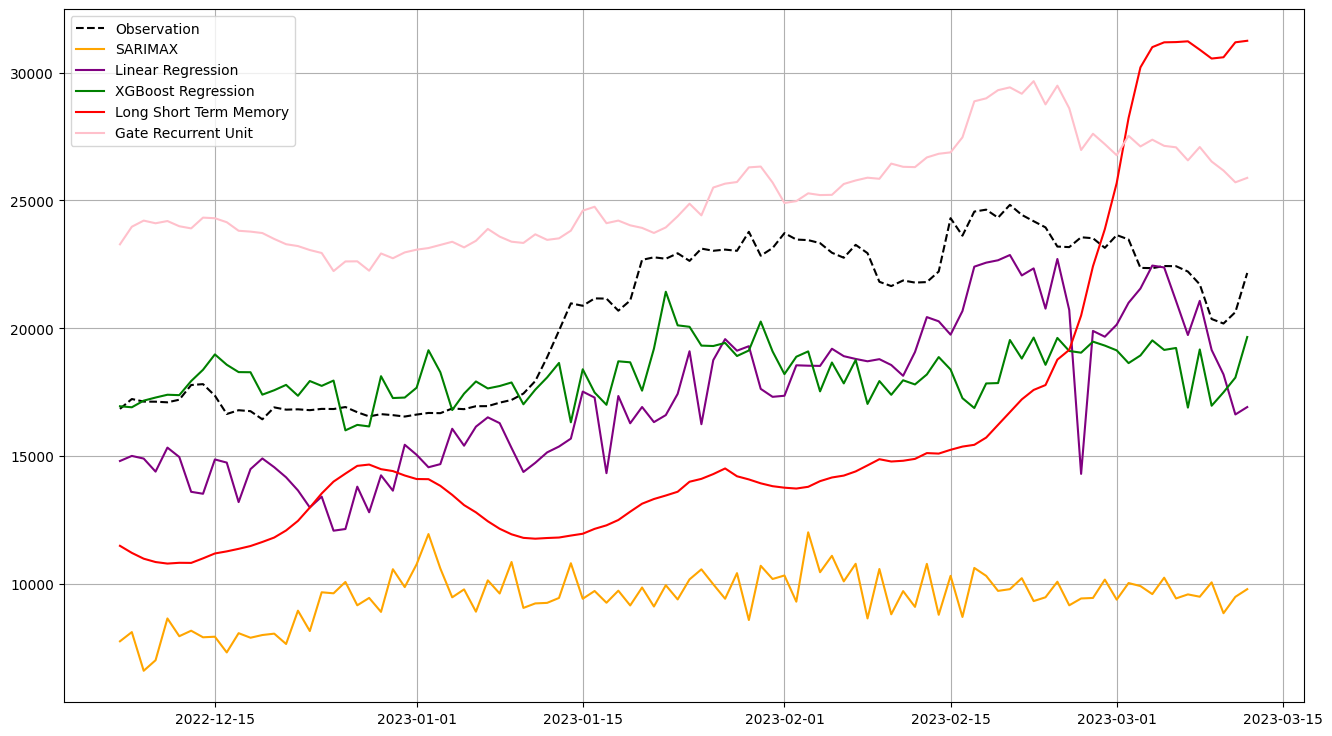

In [123]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.plot(df['Y_test'], 'black', label='Observation', linestyle='dashed')
plt.plot(df['Y_SARIMAX'], 'orange', label='SARIMAX')
plt.plot(df["Y_LR"], 'purple', label=f'Linear Regression')
plt.plot(df["Y_XGBR"], 'green', label=f'XGBoost Regression')
plt.plot(df["Y_LSTM"], 'red', label=f'Long Short Term Memory')
plt.plot(df["Y_GRU"], 'pink', label=f'Gate Recurrent Unit')
plt.legend()
plt.savefig(f'G:/My Drive/IS6102.CH1701/Result/Image/{T1}_{TF1}.png')

## Save Model

In [84]:
from tensorflow.keras.models import load_model

In [26]:
import pickle
# Other
sarimax_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
pickle.dump(sarimax_fit, open(sarimax_filename, 'wb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
pickle.dump(lr_mod, open(lr_filename, 'wb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
pickle.dump(xgbr_mod, open(xgbr_filename, 'wb'))
#### Keras
lstm_mod.save(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod.save(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

# Draft

In [16]:
from tensorflow.keras.models import load_model

In [17]:
import pickle
# Other
sarimax_filename =  f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
sarimax_mod = pickle.load(open(sarimax_filename, 'rb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

In [18]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [19]:
sarimax_pred = sarimax_mod.predict(start = 1, end = len(y13_original_minmax_test), exog = x13_original_minmax_test.reshape(len(x13_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x13_original_minmax_test.reshape(len(x13_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x13_original_minmax_test.reshape(len(x13_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x13_original_minmax_test)
gru_pred = gru_mod.predict(x13_original_minmax_test)

3/3 [==============================] - 1s 9ms/step


In [20]:
y_test_inv = scaler_single.inverse_transform(y13_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [21]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [22]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1066,)


In [23]:
i = 0
while i < TF1:
    date_array = np.append(date_array, date_array[-1] + np.timedelta64(1,'D')) 
    i = i + 1
date_array[-TF1]

numpy.datetime64('2023-03-13T00:00:00.000000000')

In [24]:
date_test = date_array[-NTest:]
date_test = date_test

In [25]:
y_test_inv = y_test_inv.reshape(len(y_test_inv), )
y_sarimax = y_sarimax.reshape(len(y_sarimax), )
y_lr = y_lr.reshape(len(y_lr), )
y_xgbr = y_xgbr.reshape(len(y_xgbr), )
y_lstm = y_lstm.reshape(len(y_lstm), )
y_gru = y_gru.reshape(len(y_gru), )


In [26]:
detail_sarima = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax
}
df_sarima = pd.DataFrame(detail_sarima, columns = ["Date", "Y_test","Y_SARIMAX"])
df_sarima.set_index("Date", inplace = True)
df_sarima.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_SARIMAX.csv")

In [27]:
detail_lr = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_LR": y_lr
}
df_lr = pd.DataFrame(detail_lr, columns = ["Date", "Y_test","Y_LR"])
df_lr.set_index("Date", inplace = True)
df_lr.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_LR.csv")

In [28]:
detail_XGRB = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_XGBR": y_xgbr
}
df_XGRB = pd.DataFrame(detail_XGRB, columns = ["Date", "Y_test","Y_XGRB"])
df_XGRB.set_index("Date", inplace = True)
df_XGRB.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_XGRB.csv")

In [29]:
detail_LSTM = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_LSTM": y_lstm
}
df_LSTM = pd.DataFrame(detail_LSTM, columns = ["Date", "Y_test","Y_LSTM"])
df_LSTM.set_index("Date", inplace = True)
df_LSTM.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_LSTM.csv")

In [30]:
detail_GRU = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_GRU": y_gru
}
df_GRU = pd.DataFrame(detail_GRU, columns = ["Date", "Y_test","Y_GRU"])
df_GRU.set_index("Date", inplace = True)
df_GRU.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_GRU.csv")

In [31]:
detail = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax,
    "Y_LR": y_lr,
    "Y_XGBR": y_xgbr,
    "Y_LSTM": y_lstm,
    "Y_GRU": y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_ALL.csv")